In [1]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import pickle
import matplotlib.pyplot as plt



In [3]:
# Import data
data = pd.read_csv('data_train_diabetes_health_indicators.csv')
data['Diabetes_012'] = data['Diabetes_012'].astype(int)
data=data.drop(columns=['Unnamed: 0'])
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)

In [4]:
# Analyse data
pd.set_option('display.max_columns', None)

print(data.head()) # voir les 5 premières lignes

data_dim = data.shape # la dimension du data : 47276*22 dont 1 variable cible,21 variables expliquées

data_type = data.dtypes # les variables sont tous de type int ou float

data_describe=data.describe() # Résumé statistique des données numériques

data_nb_valeur_manquante = data.isnull().sum() #il n'y a pas de valeur manquante

colonne_valeurs_counts = data['Diabetes_012'].value_counts()
#On observe un déséquilibre pour les trois classes,on a 39508 (83.7%) pour no diabetes or only during pregnancy prediabetes (class 0),
#6689 (14%) pour prediabetes (class 1),et 1079 (2.3%) pour diabetes (class 3).




   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0             2       1       1.0          1  32.0     1.0     0.0   
1             0       0       1.0          1  28.0     0.0     0.0   
2             0       0       1.0          1  24.0     1.0     0.0   
3             2       1       1.0          1  38.0     0.0     0.0   
4             0       0       1.0          1  30.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   1.0             1       1        1                  0   
1                   0.0             0       0        1                  0   
2                   0.0             1       0        1                  1   
3                   0.0             1       0        1                  0   
4                   0.0             0       0        0                  0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0              1          0.0      2.0 

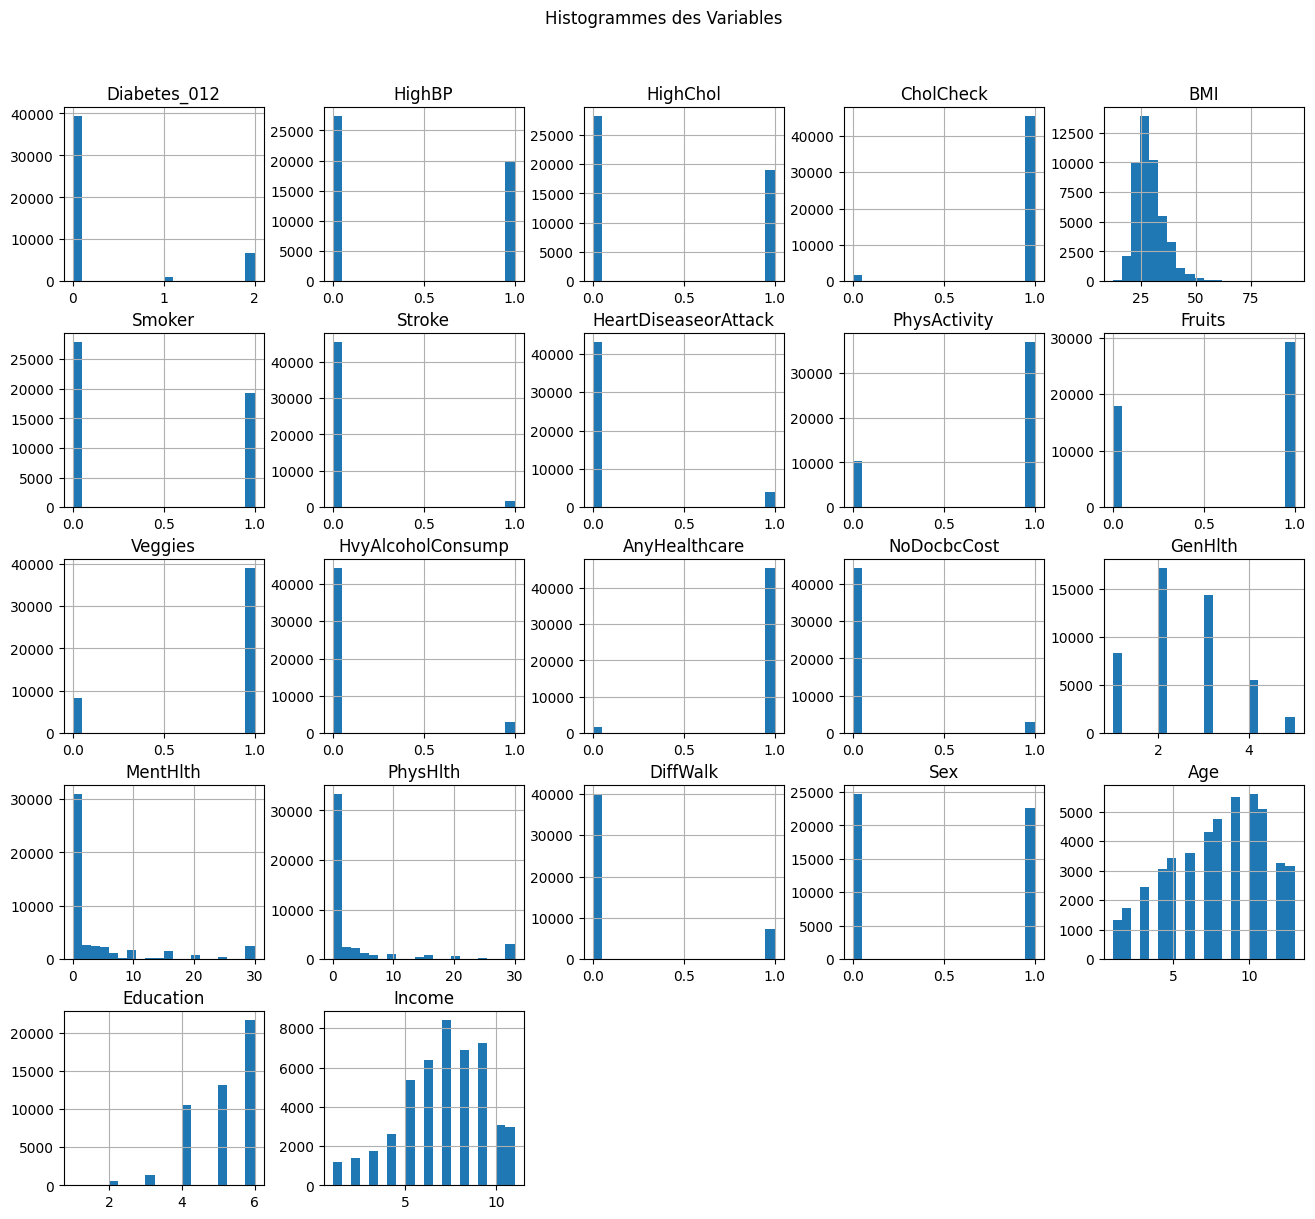

In [5]:
# Afficher les histogrammes des variables
data.hist(bins=20, figsize=(16, 14))
plt.suptitle("Histogrammes des Variables", y=0.95)
plt.show()




In [6]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Predict on test data
pred = rf_model.predict(X_test)

In [ ]:
# Evaluate model predictions
print(f'Classification_report:\n {classification_report(y_test,pred)}')

Classification_report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      7902
           1       0.05      0.02      0.03       216
           2       0.33      0.55      0.41      1338

    accuracy                           0.76      9456
   macro avg       0.43      0.46      0.43      9456
weighted avg       0.80      0.76      0.77      9456



In [9]:
# Export model
pickle.dump(rf_model, open("RandomForest_model.pkl", "wb"))